In [67]:
#conda activate base
#pip install langgraph

!pip install langgraph

Access is denied.


In [68]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [69]:
class AgentState(TypedDict):
    message : str
def greeting_node(state : AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""
    state['message'] = 'Hey ' + state['message'] + ", how is your day going ?"
    return state

In [70]:
graph = StateGraph(AgentState)
graph.add_node('greeter', greeting_node)
graph.set_entry_point('greeter')
graph.set_finish_point('greeter')

app = graph.compile()

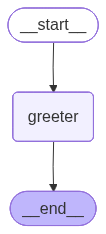

In [71]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [72]:
result = app.invoke({'message':'bob'})

In [73]:
result['message']

'Hey bob, how is your day going ?'

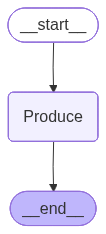

hey There  steve! Your Sum = 10


In [5]:
#multi graph

from typing import  TypedDict, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    values : List[int]
    name : str
    result : str

def Agentic(state : AgentState) -> AgentState:
    """This function process multiple values diff inputs"""
    state['result'] = f"hey There  {state['name']}! Your Sum = {sum(state['values'])}"
    return state


graph = StateGraph(AgentState)
graph.add_node('Produce', Agentic)
graph.set_entry_point('Produce')
graph.set_finish_point('Produce')

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

Answ = app.invoke({'values' : [1,2,3,4],'name' : 'steve'})
print(Answ['result'])

In [26]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

class Jack_Sparrow(TypedDict):
    name : str
    values : List[int]
    result : str

def mul(values:List[int]) -> int:
    product = 1
    for i in values:
        product *= i
    return product

def Gips(state : Jack_Sparrow) -> Jack_Sparrow:
    """ It is asking Jack Sparrow age """
    state['result'] =  f" Hi {state['name']}, Your answer is {mul(state['values'])}"
    return state

graph = StateGraph(Jack_Sparrow)
graph.add_node("Pir", Gips)
graph.set_entry_point("Pir")
graph.set_finish_point("Pir")

app = graph.compile()

Island = app.invoke({
    "name": "Jacks Sparrow",
    "values": [1,2,3,4],
    "result": ""
})
print(Island)

{'name': 'Jacks Sparrow', 'values': [1, 2, 3, 4], 'result': ' Hi Jacks Sparrow, Your answer is 24'}


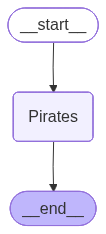

Hi Jack Sparrow, Your answer is: 24


In [7]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

# 1. Correct state
class Jack_Sparrow(TypedDict):
    name: str
    values: List[int]
    result: str

def mul(values: List[int]) -> int:
    product = 1
    for i in values:
        product *= i
    return product


# 3. Node
def Gips(state: Jack_Sparrow) -> Jack_Sparrow:
    state["result"] = f"Hi {state['name']}, Your answer is: {mul(state['values'])}"
    return state

# 4. Graph
graph = StateGraph(Jack_Sparrow)
graph.add_node("Pirates", Gips)
graph.set_entry_point("Pirates")
graph.set_finish_point("Pirates")

app = graph.compile()

from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))

# 5. Run
Island = app.invoke({
    "name": "Jack Sparrow",
    "values": [1,2,3,4],
    "result": ""
})

print(Island['result'])

In [28]:
# Sequential Graph

from typing import TypedDict
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    name : str
    age : str
    final : str

def first_node(state: AgentState) -> AgentState:
    state['final'] = f" Hi {state['name']}!"
    return state

def second_node(state: AgentState) -> AgentState:
    state['final'] = state['final'] + f" You are {state['age']} years old!"
    return state

graph = StateGraph(AgentState)
graph.add_node('first_node',first_node)
graph.add_node('second_node',second_node)
graph.set_entry_point('first_node')
graph.add_edge("first_node","second_node")
graph.set_finish_point("second_node")
app=graph.compile()

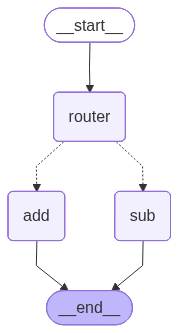

In [42]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
result = app.invoke({'name' : "charlie", "age":20})
print(result['final'])

 Hi charlie! You are 20 years old!


In [34]:
# Task 3

from typing import TypedDict
from langgraph.graph import StateGraph

class Agent_Avatar(TypedDict):
    name : str
    age : str
    skills : str
    result : str

def first_node(state: Agent_Avatar) -> Agent_Avatar:
    state['result'] =  f" {state['name']}  welcome to the system!"
    return state

def second_node(state: Agent_Avatar) -> Agent_Avatar:
    state['result'] = state['result'] + f" You are {state['age']} Years old!"
    return state


def third_node(state: Agent_Avatar) -> Agent_Avatar:
    state['result'] = state['result'] + f" You have Skills in : {state['skills']}"
    return state



graph = StateGraph(Agent_Avatar)
graph.add_node('first_node', first_node)
graph.add_node('second_node', second_node)
graph.add_node('third_node', third_node)
graph.set_entry_point('first_node')
graph.add_edge('first_node','second_node')
graph.add_edge('second_node','third_node')
graph.set_finish_point('third_node')


app = graph.compile()


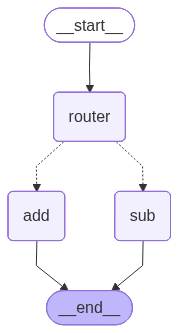

In [43]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [44]:
Island = app.invoke({'name' : 'Linda', 'age' : 31, 'skills' : "Pyhton  Machine Learning and LangGraph", 'result': ''})
print(Island['result'])

 Linda  welcome to the system! You are 31 Years old! You have Skills in : Pyhton  Machine Learning and LangGraph


In [6]:
# conditional Graph

from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    number1 : int
    operation : str
    number2 : int
    finalNumber : int

def add_operation(state: AgentState) -> AgentState:
    
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def sub_operation(state: AgentState) -> AgentState:
    
    state['finalNumber'] = state['number1'] - state['number2']
    return state


def decide_next_node(state: AgentState) -> AgentState:
    if state['operation'] == '+':
        return "add_operation"
    elif state['operation'] == '-':
        return "sub_operation"



graph = StateGraph(AgentState)
graph.add_node("add_operation",add_operation)
graph.add_node("sub_operation",sub_operation)
graph.add_node("router", lambda state:state)

graph.add_edge(START,'router')
graph.add_conditional_edges('router' , decide_next_node, {"add_operation": "add_operation", "sub_operation" : "sub_operation"})
graph.add_edge("add_operation", END)
graph.add_edge("sub_operation", END)

app = graph.compile()
        
    
    


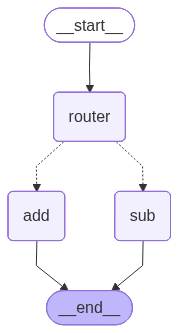

In [44]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [82]:
initial_state = AgentState(number1 = 10, operation = '+', number2 = 5)
print(app.invoke(initial_state))

{'number1': 10, 'operation': '+', 'number2': 5, 'finalNumber': 15}


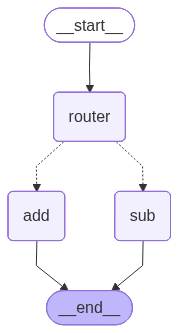

{'number1': 10, 'operation': '-', 'number2': 20, 'final_Number': -10}


In [38]:
from typing import TypedDict
from langgraph.graph import StateGraph , START, END

class ai_Agentic(TypedDict):
    number1 : int
    operation : str
    number2 : int
    final_Number : int


def operation_result(state: ai_Agentic) -> str:
    if state['operation'] == '+':
        return 'add' 
    elif state['operation'] == '-':
        return 'sub'

def add(state: ai_Agentic) -> ai_Agentic:
    state['final_Number'] = state['number1'] + state['number2']
    return state

def sub(state: ai_Agentic) -> ai_Agentic:
    state['final_Number'] = state['number1'] - state['number2']
    return state

graph = StateGraph(ai_Agentic)
graph.add_node('router', lambda state:state)
graph.add_node('add', add)
graph.add_node('sub', sub)

graph.add_edge(START, 'router')
graph.add_conditional_edges('router', operation_result, {'add' : 'add' , 'sub' : 'sub'})
graph.add_edge('add',END)
graph.add_edge('sub',END)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

initial_result = {
    'number1' : 10 , 
    'operation' : '-' , 
    'number2' : 20
}
print(app.invoke(initial_result))

In [11]:
#Task 

from typing import TypedDict
from langgraph.graph import StateGraph, START , END

class Ai_Robot(TypedDict):
    number1 : int
    number2 : int
    operation1 : str
    finalNumber1 : int
    
    number3 : int
    number4 : int
    operation2 : str
    finalNumber2 : int


def Calcul(state: Ai_Robot) -> Ai_Robot:
    if state['operation1'] == '-':
        return "sub"
    elif state['operation1'] == '+':
        return "add"
    
        
def  Calcul2(state: Ai_Robot) -> Ai_Robot:
    if state['operation2'] == '+':
        return "add"
    elif state['operation2'] == '-':
        return "sub"


def sub(state: Ai_Robot) -> Ai_Robot:
    state['finalNumber1'] = state['number1'] - state['number2']
    return state


def add(state: Ai_Robot) -> Ai_Robot:
    state['finalNumber1'] = state['number2'] + state['number3']
    return state

def sub2(state: Ai_Robot) -> Ai_Robot:
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def add2(state: Ai_Robot) -> Ai_Robot:
    state['finalNumber2'] = state['number3'] + state['number4']
    return state


graph = StateGraph(Ai_Robot)

# First router
graph.add_node("router", lambda s: s)
graph.add_node("add", add)
graph.add_node("sub", sub)

graph.add_edge(START, "router")
graph.add_conditional_edges("router", Calcul, {"add": "add", "sub": "sub"})
graph.add_edge("add", "router2")
graph.add_edge("sub", "router2")

# Second router
graph.add_node("router2", lambda s: s)
graph.add_node("add2", add2)
graph.add_node("sub2", sub2)

graph.add_conditional_edges("router2", Calcul2, {"add": "add2", "sub": "sub2"})
graph.add_edge("add2", END)
graph.add_edge("sub2", END)


app = graph.compile()

        

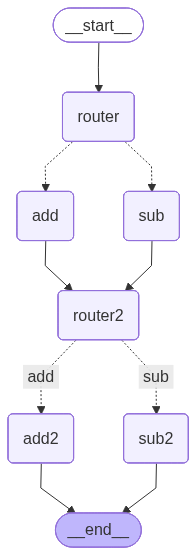

In [12]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
initial_state = {
    "number1": 10,
    "number2": 5,
    "operation1": "-",
    "number3": 7,
    "number4": 2,
    "operation2": "+",
}

print(app.invoke(initial_state))



{'number1': 10, 'number2': 5, 'operation1': '-', 'finalNumber1': 5, 'number3': 7, 'number4': 2, 'operation2': '+', 'finalNumber2': 9}


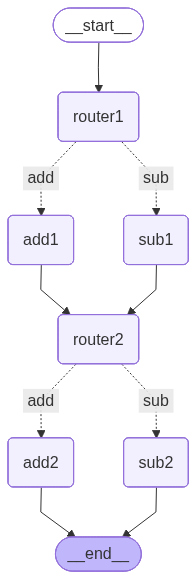

{'number1': 10, 'number2': 5, 'operation1': '-', 'finalNumber1': 5, 'number3': 7, 'number4': 2, 'operation2': '+', 'finalNumber2': 9}


In [24]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class Ai_Robot(TypedDict):
    number1: int
    number2: int
    operation1: str
    finalNumber1: int

    number3: int
    number4: int
    operation2: str
    finalNumber2: int

def Calcul(state: Ai_Robot):
    if state["operation1"] == "-":
        return "sub"
    elif state["operation1"] == "+":
        return "add"

def Calcul2(state: Ai_Robot):
    if state["operation2"] == "+":
        return "add"
    elif state["operation2"] == "-":
        return "sub"

def add1(state: Ai_Robot):
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def sub1(state: Ai_Robot):
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def add2(state: Ai_Robot):
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def sub2(state: Ai_Robot):
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

graph = StateGraph(Ai_Robot)

# First router
graph.add_node("router1", lambda s: s)
graph.add_node("add1", add1)
graph.add_node("sub1", sub1)

graph.add_edge(START, "router1")
graph.add_conditional_edges("router1", Calcul, {"add": "add1", "sub": "sub1"})
graph.add_edge("add1", "router2")
graph.add_edge("sub1", "router2")

# Second router
graph.add_node("router2", lambda s: s)
graph.add_node("add2", add2)
graph.add_node("sub2", sub2)

graph.add_conditional_edges("router2", Calcul2, {"add": "add2", "sub": "sub2"})
graph.add_edge("add2", END)
graph.add_edge("sub2", END)

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


initial_state = {
    "number1": 10,
    "number2": 5,
    "operation1": "-",
    "number3": 7,
    "number4": 2,
    "operation2": "+",
}

print(app.invoke(initial_state))



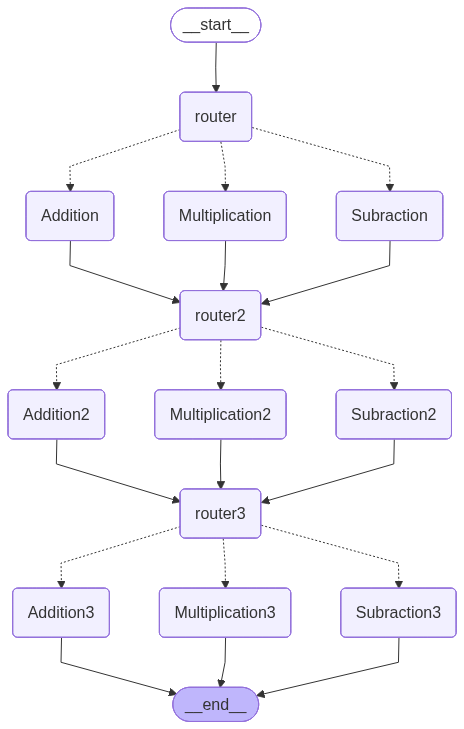

{'number1': 10, 'number2': 5, 'operation1': '-', 'finalNumber1': 5, 'number3': 10, 'number4': 5, 'operation2': '+', 'finalNumber2': 15, 'number5': 10, 'number6': 5, 'operation3': '*', 'finalNumber3': 15}


In [41]:
#task 3 

from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class Agent_Robot(TypedDict):
    number1: int
    number2: int
    operation1: str
    finalNumber1: int

    number3: int
    number4: int
    operation2: str
    finalNumber2: int

    number5: int
    number6: int
    operation3 : str
    finalNumber3 : int


def Operation(state: Agent_Robot) -> Agent_Robot:
    if state['operation1'] == '-':
        return 'Subraction'
    elif state['operation2'] == '+':
        
        return 'Addition'
    elif state['operation3'] == '*':
        return 'Multiplication'

    raise ValueError("Invalid operation")



def Operation2(state: Agent_Robot) -> Agent_Robot:
    if state['operation2'] == '-':
        return 'Subraction2'
    elif state['operation2'] == '+':
        return 'Addition2'
    elif state['operation3'] == '*':
        return 'Multiplication2'
    raise ValueError("Invalid operation")


def Operation3(state: Agent_Robot) -> Agent_Robot:
    if state['operation3'] == '-':
        return 'Subraction3'
    elif state['operation2'] == '+':
        return 'Addition3'
    elif state['operation3'] == '*':
        return 'Multiplication3'
    raise ValueError("Invalid operation")


def Subraction(state: Agent_Robot) -> Agent_Robot:
    state['finalNumber1'] = state['number1'] - state['number2']
    return state


def Addition(state: Agent_Robot) -> Agent_Robot:
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def Multiplication(state: Agent_Robot) -> Agent_Robot:
    state['finalNumber1'] = state['number1'] * state['number2']
    return state




def Subraction2(state: Agent_Robot) -> Agent_Robot:
    state['finalNumber2'] = state['number3'] - state['number4']
    return state


def Addition2(state: Agent_Robot) -> Agent_Robot:
    state['finalNumber2'] = state['number3'] + state['number4']
    return state


def Multiplication2(state: Agent_Robot) -> Agent_Robot:
    state['finalNumber2'] = state['number3'] * state['number4']
    return state




def Subraction3(state: Agent_Robot) -> Agent_Robot:
    state['finalNumber3'] = state['number5'] - state['number6']
    return state


def Addition3(state: Agent_Robot) -> Agent_Robot:
    state['finalNumber3'] = state['number5'] + state['number6']
    return state


def Multiplication3(state: Agent_Robot) -> Agent_Robot:
    state['finalNumber3'] = state['number5'] * state['number6']
    return state


    
graph  = StateGraph(Agent_Robot)

graph.add_node('router', lambda state:state)
graph.add_node('Subraction', Subraction)
graph.add_node('Addition', Addition)
graph.add_node('Multiplication', Multiplication)

graph.add_edge(START, 'router')
graph.add_conditional_edges('router', Operation, {'Subraction' : 'Subraction' , 'Addition': 'Addition' , 'Multiplication': 'Multiplication'})
graph.add_edge('Subraction', 'router2')
graph.add_edge('Addition', 'router2')
graph.add_edge('Multiplication', 'router2')

graph.add_node('router2', lambda state:state)
graph.add_node('Subraction2', Subraction2)
graph.add_node('Addition2', Addition2)
graph.add_node('Multiplication2', Multiplication2)


graph.add_conditional_edges('router2', Operation2, {'Subraction2' : 'Subraction2' , 'Addition2': 'Addition2' , 'Multiplication2': 'Multiplication2'})
graph.add_edge('Subraction2', 'router3')
graph.add_edge('Addition2', 'router3')
graph.add_edge('Multiplication2', 'router3')

graph.add_node('router3', lambda state:state)
graph.add_node('Subraction3', Subraction3)
graph.add_node('Addition3', Addition3)
graph.add_node('Multiplication3', Multiplication3)

graph.add_conditional_edges('router3', Operation3, {'Subraction3' : 'Subraction3' , 'Addition3': 'Addition3' , 'Multiplication3': 'Multiplication3'})
graph.add_edge('Subraction3', END)
graph.add_edge('Addition3', END)
graph.add_edge('Multiplication3', END)

app = graph.compile()



from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


initial_state = { 'number1' : 10, 'operation1' : '-' , 'number2' : 5 , 'number3' : 10, 'operation2' : '+' , 'number4' : 5 ,'number5' : 10, 'operation3' : '*' , 'number6' : 5}
print(app.invoke(initial_state))

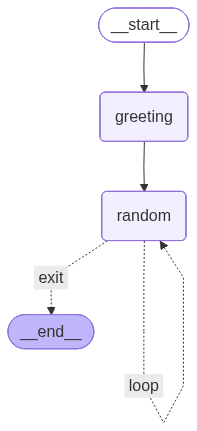

Entering Loop 1
Entering Loop 2
Entering Loop 3
Entering Loop 4


{'name': 'hi there,Linda', 'counter': 5, 'number': [2, 9, 6, 10, 5]}

In [74]:
# Looping Graph

from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

class AgentState(TypedDict):
    name : str
    counter : int
    number : List[int]

def greeting_node(state: AgentState) -> AgentState:
    state['name'] = f'hi there,{state['name']}'
    state['counter'] = 0
    return state
    

def random_node(state: AgentState) -> AgentState:
    state['number'].append(random.randint(0,10))
    state['counter'] += 1
    return state


def operation(state: AgentState) -> AgentState:
    if state['counter'] < 5:
        print('Entering Loop', state['counter'])
        return 'loop'
    else:
        return 'exit'

graph = StateGraph(AgentState)
graph.add_node('greeting',greeting_node)
graph.add_node('random',random_node)

graph.add_edge('greeting','random')
graph.add_conditional_edges('random',operation, {'loop':'random','exit' : END})

graph.set_entry_point('greeting')

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))
        
app.invoke({'name' : 'Linda', 'number' : [], 'counter': -100})
    

In [88]:
# Task 5
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

class GameState(TypedDict):
    player_name : str
    target_number : int
    guesses : List[int]
    attempts : int
    hint : str
    lower_bound : int
    upper_bound : int
    

In [89]:
def setup_node(state: GameState) -> GameState:
    """Initialize the game with a random target number"""
    state["player_name"] = f"Welcome, {state['player_name']}!"
    state["target_number"] = random.randint(1, 20)
    state["guesses"] = []
    state["attempts"] = 0
    state["hint"] = "Game started! Try to guess the number."
    state["lower_bound"] = 1 
    state["upper_bound"] = 20 
    print(f"{state['player_name']} The game has begun. I'm thinking of a number between 1 and 20.")
    return state

In [90]:
def guess_node(state: GameState) -> GameState:
    """Generate a smarter guess based on previous hints"""
    
    possible_guesses = [i for i in range(state["lower_bound"], state["upper_bound"] + 1) if i not in state["guesses"]]
    if possible_guesses:
        guess = random.choice(possible_guesses)
    else:
        
        guess = random.randint(state["lower_bound"], state["upper_bound"])
    
    state["guesses"].append(guess)
    state["attempts"] += 1
    print(f"Attempt {state['attempts']}: Guessing {guess} (Current range: {state['lower_bound']}-{state['upper_bound']})")
    return state

In [91]:
def hint_node(state: GameState) -> GameState:
    """Here we provide a hint based on the last guess and update the bounds"""
    latest_guess = state["guesses"][-1]
    target = state["target_number"]
    
    if latest_guess < target:
        state["hint"] = f"The number {latest_guess} is too low. Try higher!"
        
        state["lower_bound"] = max(state["lower_bound"], latest_guess + 1)
        print(f"Hint: {state['hint']}")
        
    elif latest_guess > target:
        state["hint"] = f"The number {latest_guess} is too high. Try lower!"
      
        state["upper_bound"] = min(state["upper_bound"], latest_guess - 1)
        print(f"Hint: {state['hint']}")
    else:
        state["hint"] = f"Correct! You found the number {target} in {state['attempts']} attempts."
        print(f"Success! {state['hint']}")
    
    return state

In [92]:
def should_continue(state: GameState) -> str:
    """Determine if we should continue guessing or end the game"""
    
    # There are 2 end conditions - either 7 is reached or the correct number is guessed
    
    latest_guess = state["guesses"][-1]
    if latest_guess == state["target_number"]:
        print(f"GAME OVER: Number found!")
        return "end"
    elif state["attempts"] >= 7:
        print(f"GAME OVER: Maximum attempts reached! The number was {state['target_number']}")
        return "end"
    else:
        print(f"CONTINUING: {state['attempts']}/7 attempts used")
        return "continue"

In [93]:
graph = StateGraph(GameState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint_node", hint_node)  


graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")  


graph.add_conditional_edges(
    "hint_node", 
    should_continue,
    {
        "continue": "guess",
        "end": END
    }
)

graph.set_entry_point("setup")
app = graph.compile()

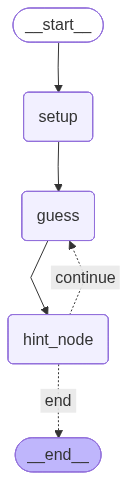

In [94]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [95]:
result = app.invoke({
    "player_name": "Student",
    "guesses": [],
    "attempts": 0,
    "lower_bound": 1,
    "upper_bound": 20,
    "target": 0,   # will be overwritten by setup
    "hint": ""     # will be overwritten by hint_node
})


Welcome, Student! The game has begun. I'm thinking of a number between 1 and 20.
Attempt 1: Guessing 3 (Current range: 1-20)
Hint: The number 3 is too low. Try higher!
CONTINUING: 1/7 attempts used
Attempt 2: Guessing 19 (Current range: 4-20)
Hint: The number 19 is too high. Try lower!
CONTINUING: 2/7 attempts used
Attempt 3: Guessing 14 (Current range: 4-18)
Hint: The number 14 is too high. Try lower!
CONTINUING: 3/7 attempts used
Attempt 4: Guessing 13 (Current range: 4-13)
Hint: The number 13 is too high. Try lower!
CONTINUING: 4/7 attempts used
Attempt 5: Guessing 5 (Current range: 4-12)
Hint: The number 5 is too low. Try higher!
CONTINUING: 5/7 attempts used
Attempt 6: Guessing 7 (Current range: 6-12)
Hint: The number 7 is too low. Try higher!
CONTINUING: 6/7 attempts used
Attempt 7: Guessing 8 (Current range: 8-12)
Hint: The number 8 is too low. Try higher!
GAME OVER: Maximum attempts reached! The number was 12
